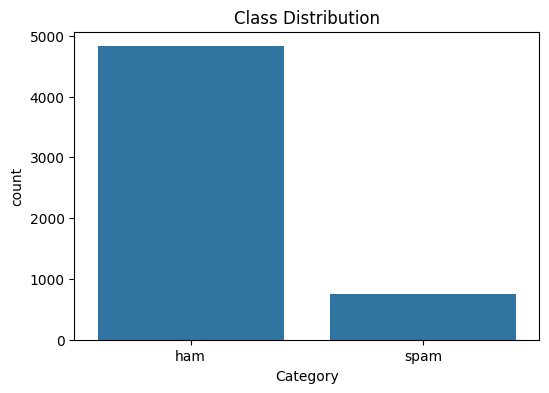

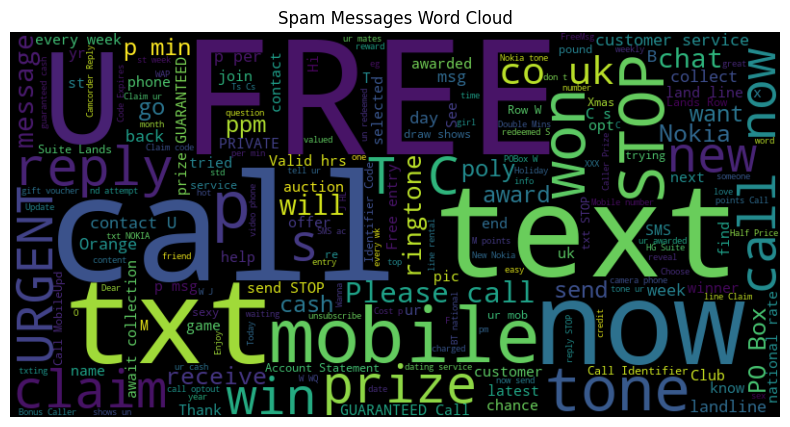

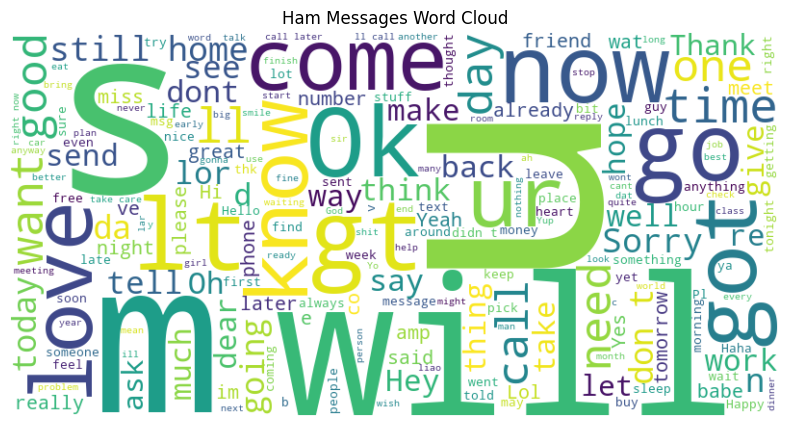

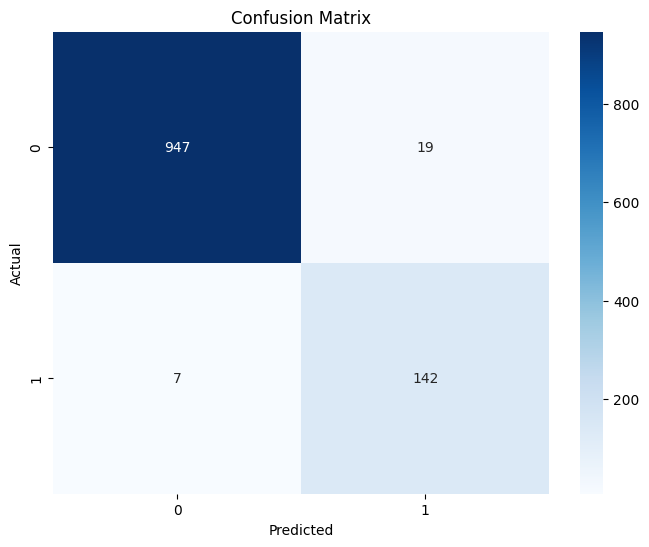

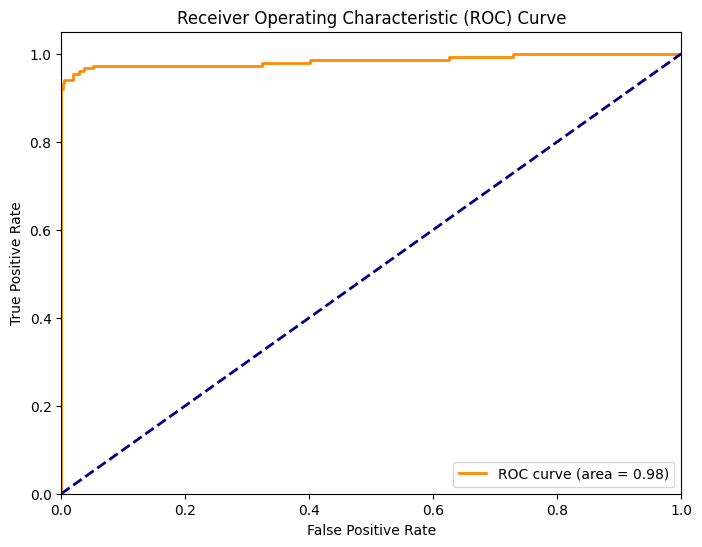

Accuracy: 0.9766816143497757
Confusion Matrix:
 [[947  19]
 [  7 142]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.99       966
        spam       0.88      0.95      0.92       149

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Predictions for new messages: ['spam' 'ham']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import pickle

# Load the data
data = pd.read_csv('mail_data.csv')

# Check for missing values
data.dropna(inplace=True)

# Remove special characters and numbers from the text
data['Message'] = data['Message'].str.replace('[^a-zA-Z]', ' ', regex=True)

# Feature Extraction
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Message'])
y = data['Category']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Save the model and vectorizer
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Predictions
y_pred = model.predict(X_test)

# Visualization: Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=data)
plt.title('Class Distribution')
plt.show()

# Visualization: Word Cloud
spam_words = ' '.join(list(data[data['Category'] == 'spam']['Message']))
ham_words = ' '.join(list(data[data['Category'] == 'ham']['Message']))

spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()

# Visualization: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization: ROC Curve
y_test_bin = y_test.apply(lambda x: 1 if x == 'spam' else 0)
y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Prediction for new messages
new_messages = ["Free entry in 2 a wkly comp to win FA Cup final tkts", "Let's meet for lunch tomorrow"]
new_messages_transformed = vectorizer.transform(new_messages)
predictions = model.predict(new_messages_transformed)
print("Predictions for new messages:", predictions)
